# Práctica TID Final: *Pokemon- Weedle's Cave* 
## Autores:
Pedro Manuel Flores Crespo

Aure Nogueras Lara

Marcin Michal Januszewski 

Enero 2020


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np

# Análisis exploratorio 



In [ ]:
combats = pd.read_csv("combats.csv")
pokemon = pd.read_csv("pokemon.csv")
tests = pd.read_csv("tests.csv")

In [ ]:
pokemon_original = pd.read_csv("pokemon.csv")

## Combates

In [ ]:
combats.shape

(50000, 3)

In [ ]:
combats.describe()

,First_pokemon,Second_pokemon,Winner
count,50000.000000,50000.000000,50000.000000
mean,400.495640,403.159660,408.890100
std,229.549429,230.083644,231.159961
min,1.000000,1.000000,1.000000
25%,203.000000,207.000000,206.000000
50%,399.000000,402.000000,422.000000
75%,597.250000,602.000000,606.000000
max,800.000000,800.000000,800.000000


No tiene mucho "jugo". Habría que mezclarlo con el de las estadísticas de los pokémones

In [ ]:
combats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   First_pokemon   50000 non-null  int64
 1   Second_pokemon  50000 non-null  int64
 2   Winner          50000 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB


## Pokémon


In [ ]:
pokemon.shape

(800, 12)

In [ ]:
pokemon.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


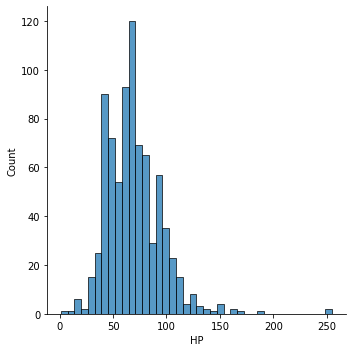

In [ ]:
sns.displot(pokemon, x="HP")

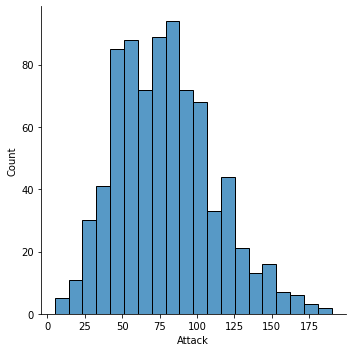

In [ ]:
sns.displot(pokemon, x="Attack")

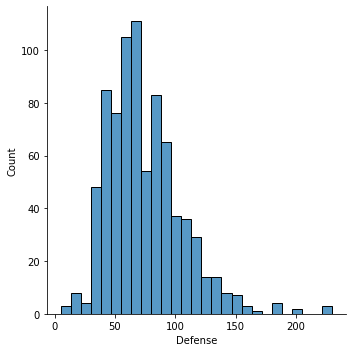

In [ ]:
sns.displot(pokemon, x="Defense")

In [ ]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


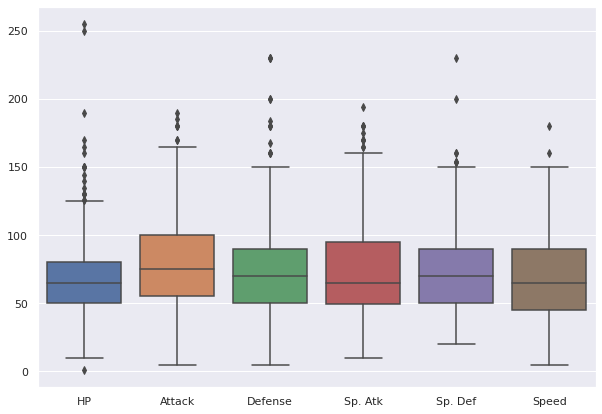

In [ ]:
sns.set(rc={'figure.figsize':(10,7)})

pokemon2 = pokemon.drop(['#', 'Generation', 'Legendary'],1)
sns.boxplot(data=pokemon2)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


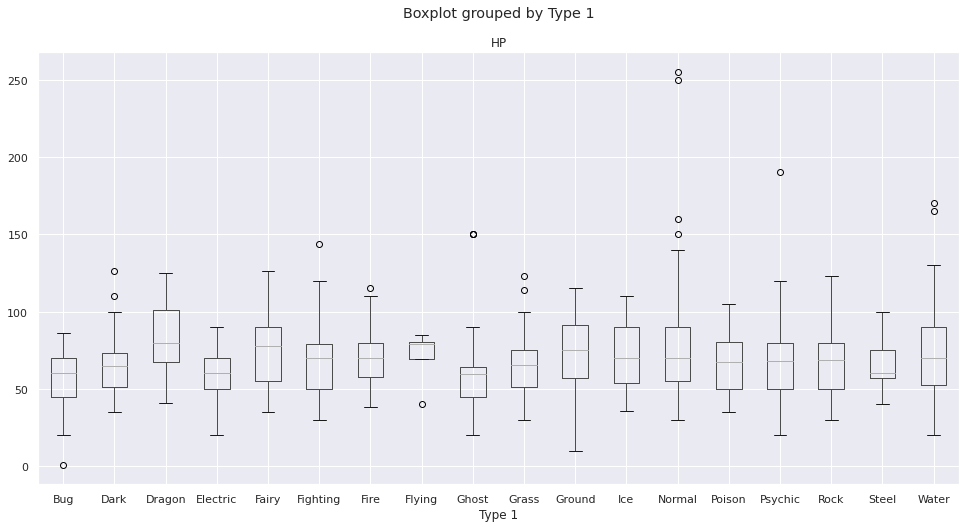

In [ ]:
sns.set(rc={'figure.figsize':(16,8)})

pokemon.boxplot(column='HP',by = 'Type 1')

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


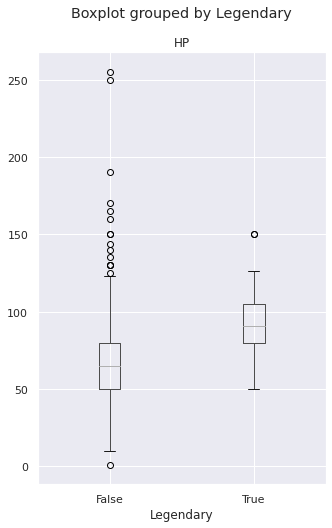

In [ ]:
sns.set(rc={'figure.figsize':(5,8)})

pokemon.boxplot(column='HP',by = 'Legendary')

In [ ]:
#https://plotly.com/python/radar-chart/

import plotly.graph_objects as go

categories = ['HP','Attack','Defense',
              'Sp. Atk', 'Sp. Def', 'Speed']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[pokemon[pokemon['Legendary'] == True]['HP'].mean(),
         pokemon[pokemon['Legendary'] == True]['Attack'].mean(),
         pokemon[pokemon['Legendary'] == True]['Defense'].mean(),
         pokemon[pokemon['Legendary'] == True]['Sp. Atk'].mean(),
         pokemon[pokemon['Legendary'] == True]['Sp. Def'].mean(),
         pokemon[pokemon['Legendary'] == True]['Speed'].mean()],
      theta=categories,
      fill='toself',
      name='Legendary'
))
fig.add_trace(go.Scatterpolar(
      r=[pokemon[pokemon['Legendary'] == False]['HP'].mean(),
         pokemon[pokemon['Legendary'] == False]['Attack'].mean(),
         pokemon[pokemon['Legendary'] == False]['Defense'].mean(),
         pokemon[pokemon['Legendary'] == False]['Sp. Atk'].mean(),
         pokemon[pokemon['Legendary'] == False]['Sp. Def'].mean(),
         pokemon[pokemon['Legendary'] == False]['Speed'].mean()],
         theta=categories,
      fill='toself',
      name='Not legendary'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 130]
    )),
  showlegend=True
)

fig.show()

## Test


In [ ]:
tests.shape

(10000, 2)

In [ ]:
tests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   First_pokemon   10000 non-null  int64
 1   Second_pokemon  10000 non-null  int64
dtypes: int64(2)
memory usage: 156.4 KB


## Correlaciones

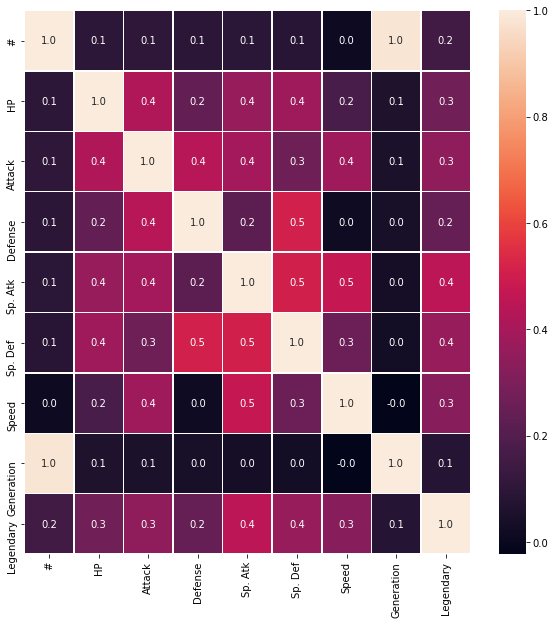

In [ ]:
f, ax = plt.subplots(figsize = (10,10)) # allcocating figure size
sns.heatmap(pokemon.corr(), annot = True, linewidths = .5, fmt = ".1f", ax=ax)
plt.show()

# Preparación de los datos

## Pokémon

Creamos una columna suma que está en el otro y leí que puede ser de utilidad

In [ ]:
pokemon['Total'] = pokemon['HP'] + pokemon['Attack'] + pokemon ['Defense'] + pokemon['Sp. Atk'] + pokemon['Sp. Def'] + pokemon['Speed']

In [ ]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
 12  Total       800 non-null    int64 
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


Rellenamos los NaN con cadenas vacías

In [ ]:
pokemon['Type 2'].isna().sum()

386

In [ ]:
pokemon['Type 2'] = pokemon['Type 2'].replace(np.nan, "-")

In [ ]:
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,5,Charmander,Fire,-,39,52,43,60,50,65,1,False,309


Eliminamos el nombre y la generación que no hace falta. Mantenemos el número para luego saber los combates

In [ ]:
pokemon = pokemon.drop(columns=['Name', 'Generation'])

In [ ]:
pokemon.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,435.10250
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,119.96304
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,180.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,330.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,450.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,515.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,780.00000


In [ ]:
pokemon.head()

,#,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Total
0,1,Grass,Poison,45,49,49,65,65,45,False,318
1,2,Grass,Poison,60,62,63,80,80,60,False,405
2,3,Grass,Poison,80,82,83,100,100,80,False,525
3,4,Grass,Poison,80,100,123,122,120,80,False,625
4,5,Fire,-,39,52,43,60,50,65,False,309


Discretizamos, ver qué cantidad va mejor. Por ahora pongo 10 

In [ ]:
pokemon['HP'] = pd.qcut(pokemon['HP'], 10, labels=False)
pokemon['Attack'] = pd.qcut(pokemon['Attack'], 10, labels=False)
pokemon['Defense'] = pd.qcut(pokemon['Defense'], 10, labels=False)
pokemon['Sp. Atk'] = pd.qcut(pokemon['Sp. Atk'], 10, labels=False)
pokemon['Sp. Def'] = pd.qcut(pokemon['Sp. Def'], 10, labels=False)
pokemon['Speed'] = pd.qcut(pokemon['Speed'], 10, labels=False)
pokemon['Total'] = pd.qcut(pokemon['Total'], 10, labels=False)

In [ ]:
pokemon.head()

,#,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Total
0,1,Grass,Poison,1,1,2,4,4,2,False,2
1,2,Grass,Poison,3,3,4,6,6,4,False,3
2,3,Grass,Poison,7,5,6,7,8,6,False,7
3,4,Grass,Poison,7,7,9,9,9,6,False,9
4,5,Fire,-,0,2,1,3,2,4,False,1


Cambiamos los tipos a numéricos

In [ ]:
pokemon['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [ ]:
pokemon['Type 2'].value_counts()

-           386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Ghost        14
Rock         14
Water        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb_make_1 = LabelEncoder()
lb_make_2 = LabelEncoder()
pokemon["Type 1"] = lb_make_1.fit_transform(pokemon["Type 1"])
pokemon["Type 2"] = lb_make_2.fit_transform(pokemon["Type 2"])
pokemon.head()

,#,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Total
0,1,9,14,1,1,2,4,4,2,False,2
1,2,9,14,3,3,4,6,6,4,False,3
2,3,9,14,7,5,6,7,8,6,False,7
3,4,9,14,7,7,9,9,9,6,False,9
4,5,6,0,0,2,1,3,2,4,False,1


Para saber cómo volver

In [ ]:
aux = lb_make_2.inverse_transform(pokemon["Type 2"])

In [ ]:
aux[0:5]

array(['Poison', 'Poison', 'Poison', 'Poison', '-'], dtype=object)

In [ ]:
aux = lb_make_1.inverse_transform(pokemon["Type 1"])

In [ ]:
aux[0:5]

array(['Grass', 'Grass', 'Grass', 'Grass', 'Fire'], dtype=object)

In [ ]:
pokemon['Type 1'].value_counts()

17    112
12     98
9      70
0      69
14     57
6      52
15     44
3      44
10     32
2      32
8      32
1      31
13     28
16     27
5      27
11     24
4      17
7       4
Name: Type 1, dtype: int64

In [ ]:
pokemon['Type 2'].value_counts()

0     386
8      97
11     35
14     34
15     33
6      26
10     25
5      23
17     22
2      20
3      18
18     14
12     14
16     14
9      14
7      12
4       6
13      4
1       3
Name: Type 2, dtype: int64

# Pruebas predecir los combates

Hacemos pruebas para ver cómo funciona esto. Construimos dataframes según algunas catacterísticas para ver cuáles se acercan más

## Random Forest


In [ ]:
from sklearn import tree
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
'''
Separamos las columnas para predecir de la columna 'clase'
'''
seed = 77
test = 0.2
def splitClase(df):
  datos = df.iloc[:,1:] # La columna WINNER SIEMPRE DEBE DE SER LA PRIMERA
  labels = df['Winner']
  return datos, labels


def construirDataFrame(df, caracteristicas):
  combats_aux = {'Winner':[]}

  for i in caracteristicas:
    combats_aux[i+'_1'] = []
    combats_aux[i+'_2'] = []

  for index, row in combats.iterrows():
      first = row['First_pokemon']
      second = row['Second_pokemon']
      winner = row['Winner']

      ## Creamos una fila con las características deseadas y el ganador
      for i in caracteristicas:
        combats_aux[i+'_1'].append(pokemon.iloc[first-1][i])
        combats_aux[i+'_2'].append(pokemon.iloc[second-1][i])

      if winner == first:
        combats_aux['Winner'].append(1)
      else:
        combats_aux['Winner'].append(0)

  combats_total = pd.DataFrame(combats_aux)

  return combats_total

def construirDataFrameTest(df, caracteristicas):
  combats_aux = {}

  for i in caracteristicas:
    combats_aux[i+'_1'] = []
    combats_aux[i+'_2'] = []

  for index, row in df.iterrows():
      first = row['First_pokemon']
      second = row['Second_pokemon']

      for i in caracteristicas:
        combats_aux[i+'_1'].append(pokemon.iloc[first-1][i])
        combats_aux[i+'_2'].append(pokemon.iloc[second-1][i])

  combats_total = pd.DataFrame(combats_aux)

  return combats_total

def RandomForestCaracteristicas(df, caracteristicas_eliminar):

  combats_total = df.copy()

  # Eliminamos las características del dataframe
  for i in caracteristicas_eliminar:
    combats_total = combats_total.drop(columns=[i+'_1', i+'_2'])

  print("Ya hemos construido el Dataframe. Ahora entrenamos el modelo.")
  ## Separamos la columna del ganador
  data, label = splitClase(combats_total)

  ## Separamos conjuntos de entrenamiento y prueba
  datos_train, datos_test, labels_train, labels_test = train_test_split( data, label, test_size=test, random_state=seed)

  clf = RandomForestClassifier(n_estimators=100)
  model = clf.fit(datos_train, labels_train) #training
  pred = model.predict(datos_test) #predicting on validation set

  #Exactitud y matrices de confusión
  print('Accuracy of ', accuracy_score(pred, labels_test)*100)
  print('--------')
  print(metrics.confusion_matrix(labels_test, pred ))
  print(metrics.classification_report(labels_test, pred))  

  # Tasas de falsos positivos, verdaeros positivos y área bajo al curva
  fpr, tpr, _ = metrics.roc_curve(labels_test, pred)
  area = metrics.roc_auc_score(labels_test, pred)

  return model, fpr, tpr, area

In [ ]:
def predecirCombate(model, df_test, caracteristicas_eliminar):
  # Construimos el dataframe 

  combats_total = df_test.copy()

  # Eliminamos las características del dataframe
  for i in caracteristicas_eliminar:
    combats_total = combats_total.drop(columns=[i+'_1', i+'_2'])

  # Predecimos
  pred = model.predict(combats_total) #predicting on validation set

  print(pred)
  return pred


In [ ]:
pokemon_nuevo = construirDataFrame(pokemon, ['Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary', 'Total'])

In [ ]:
pokemon_nuevo.head()

,Winner,Type 1_1,Type 1_2,Type 2_1,Type 2_2,HP_1,HP_2,Attack_1,Attack_2,Defense_1,Defense_2,Sp. Atk_1,Sp. Atk_2,Sp. Def_1,Sp. Def_2,Speed_1,Speed_2,Legendary_1,Legendary_2,Total_1,Total_2
0,0,15,9,11,2,1,5,3,4,2,0,1,3,2,0,1,4,False,False,1,2
1,0,9,15,6,6,8,8,6,9,5,7,7,5,9,7,9,9,True,True,8,8
2,0,4,14,8,0,2,6,0,4,6,5,6,9,8,7,1,1,False,False,3,6
3,0,6,2,0,0,0,6,0,8,0,7,5,3,0,7,0,2,False,False,0,6
4,1,15,0,18,16,5,0,2,0,9,9,8,0,4,9,3,0,False,False,6,7


In [ ]:
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [ ]:
# Type 1
model_rf1, fpr_rf1, tpr_rf1, area_rf1 = RandomForestCaracteristicas(pokemon_nuevo, ['Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary', 'Total'])
area_rf1

Ya hemos construido el Dataframe. Ahora entrenamos el modelo.
Accuracy of  59.199999999999996
--------
[[3577 1662]
 [2418 2343]]
              precision    recall  f1-score   support

           0       0.60      0.68      0.64      5239
           1       0.59      0.49      0.53      4761

    accuracy                           0.59     10000
   macro avg       0.59      0.59      0.59     10000
weighted avg       0.59      0.59      0.59     10000



0.587443694851745

In [ ]:
# Type 1 + Type 2
model_2, fpr_rf2, tpr_rf2, area_rf2 = RandomForestCaracteristicas(pokemon_nuevo, ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary', 'Total'])

Ya hemos construido el Dataframe. Ahora entrenamos el modelo.
Accuracy of  66.85
--------
[[3562 1677]
 [1638 3123]]
              precision    recall  f1-score   support

           0       0.69      0.68      0.68      5239
           1       0.65      0.66      0.65      4761

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000



In [ ]:
area_rf2

0.6679276878984178

In [ ]:
# Total + Legendary
model_3, fpr_rf3, tpr_rf3, area_rf3 = RandomForestCaracteristicas(pokemon_nuevo, ['Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])

Ya hemos construido el Dataframe. Ahora entrenamos el modelo.
Accuracy of  69.35
--------
[[3860 1379]
 [1686 3075]]
              precision    recall  f1-score   support

           0       0.70      0.74      0.72      5239
           1       0.69      0.65      0.67      4761

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



In [ ]:
area_rf3

0.691327272204624

In [ ]:
# 'Type 1', 'Type 2', 'Legendary', 'Total'
model_4, fpr_rf4, tpr_rf4, area_rf4 = RandomForestCaracteristicas(pokemon_nuevo, ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])

Ya hemos construido el Dataframe. Ahora entrenamos el modelo.
Accuracy of  75.79
--------
[[4097 1142]
 [1279 3482]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      5239
           1       0.75      0.73      0.74      4761

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



In [ ]:
area_rf4

0.7566892137832204

In [ ]:
# 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary'
model_5, fpr_rf5, tpr_rf5, area_rf5 = RandomForestCaracteristicas(pokemon_nuevo, ['Total'])

Ya hemos construido el Dataframe. Ahora entrenamos el modelo.
Accuracy of  93.15
--------
[[4904  335]
 [ 350 4411]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      5239
           1       0.93      0.93      0.93      4761

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [ ]:
area_rf5

0.9317296732265751

In [ ]:
# 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary'
model_6, fpr_rf6, tpr_rf6, area_rf6 = RandomForestCaracteristicas(pokemon_nuevo, ['Type 1', 'Type 2','Total'])

Ya hemos construido el Dataframe. Ahora entrenamos el modelo.
Accuracy of  92.75999999999999
--------
[[4878  361]
 [ 363 4398]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5239
           1       0.92      0.92      0.92      4761

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [ ]:
area_rf6

0.9274246168615901

In [ ]:
# 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary', 'Total'
model_7, fpr_rf7, tpr_rf7, area_rf7 = RandomForestCaracteristicas(pokemon_nuevo, [])

Ya hemos construido el Dataframe. Ahora entrenamos el modelo.
Accuracy of  92.99
--------
[[4890  349]
 [ 352 4409]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5239
           1       0.93      0.93      0.93      4761

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [ ]:
area_rf7

0.9297250930816767

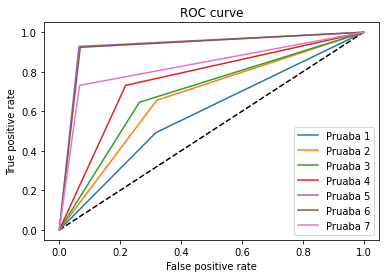

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf1, tpr_rf1, label='Pruaba 1')
plt.plot(fpr_rf2, tpr_rf2, label='Pruaba 2')
plt.plot(fpr_rf3, tpr_rf3, label='Pruaba 3')
plt.plot(fpr_rf4, tpr_rf4, label='Pruaba 4')
plt.plot(fpr_rf5, tpr_rf5, label='Pruaba 5')
plt.plot(fpr_rf6, tpr_rf6, label='Pruaba 6')
plt.plot(fpr_rf7, tpr_rf4, label='Pruaba 7')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
test_nuevo = construirDataFrameTest(tests, ['Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary', 'Total'])

In [ ]:
test_nuevo.head()

,Type 1_1,Type 1_2,Type 2_1,Type 2_2,HP_1,HP_2,Attack_1,Attack_2,Defense_1,Defense_2,Sp. Atk_1,Sp. Atk_2,Sp. Def_1,Sp. Def_2,Speed_1,Speed_2,Legendary_1,Legendary_2,Total_1,Total_2
0,17,12,0,0,7,8,6,2,4,5,4,3,6,5,5,0,False,False,4,3
1,9,17,17,11,6,8,6,5,9,6,3,4,9,4,0,1,False,False,6,4
2,3,5,8,0,6,1,7,8,4,2,9,0,6,9,8,7,True,False,8,5
3,3,9,0,0,5,6,2,6,2,4,6,8,3,4,2,4,False,False,3,5
4,12,17,8,0,0,9,2,4,0,6,0,1,0,1,5,4,False,False,0,5


In [ ]:
pred = predecirCombate(model_5, 
                test_nuevo,
                ['Total'])

[1 0 1 ... 1 1 0]


In [ ]:
tests.head(30)

,First_pokemon,Second_pokemon
0,129,117
1,660,211
2,706,115
3,195,618
4,27,656
5,126,222
6,436,207
7,121,36
8,169,636
9,302,688


In [ ]:
pred[0]

1

In [ ]:
pokemon_original.iloc[128]

#                 129
Name          Seaking
Type 1          Water
Type 2            NaN
HP                 80
Attack             92
Defense            65
Sp. Atk            65
Sp. Def            80
Speed              68
Generation          1
Legendary       False
Name: 128, dtype: object

In [ ]:
pokemon_original.iloc[116]

#                   117
Name          Lickitung
Type 1           Normal
Type 2              NaN
HP                   90
Attack               55
Defense              75
Sp. Atk              60
Sp. Def              75
Speed                30
Generation            1
Legendary         False
Name: 116, dtype: object

In [ ]:
pred[26]

1

In [ ]:
pokemon_original.iloc[163]

#                       164
Name          Mega Mewtwo X
Type 1              Psychic
Type 2             Fighting
HP                      106
Attack                  190
Defense                 100
Sp. Atk                 154
Sp. Def                 100
Speed                   130
Generation                1
Legendary              True
Name: 163, dtype: object

In [ ]:
pokemon_original.iloc[14]

#                  15
Name          Metapod
Type 1            Bug
Type 2            NaN
HP                 50
Attack             20
Defense            55
Sp. Atk            25
Sp. Def            25
Speed              30
Generation          1
Legendary       False
Name: 14, dtype: object

In [ ]:
pred[23]

0

In [ ]:
pokemon_original.iloc[96]

#                 97
Name             Muk
Type 1        Poison
Type 2           NaN
HP               105
Attack           105
Defense           75
Sp. Atk           65
Sp. Def          100
Speed             50
Generation         1
Legendary      False
Name: 96, dtype: object

In [ ]:
pokemon_original.iloc[375]

#                 376
Name           Baltoy
Type 1         Ground
Type 2        Psychic
HP                 40
Attack             40
Defense            55
Sp. Atk            40
Sp. Def            70
Speed              55
Generation          3
Legendary       False
Name: 375, dtype: object

## Validación cruzada para árboles de decisión

In [ ]:
pokemon_nuevo_noTotal = pokemon_nuevo.copy()

In [ ]:
pokemon_nuevo_noTotal = pokemon_nuevo_noTotal.drop(columns=['Total_1', 'Total_2'])

In [ ]:
data, label = splitClase(pokemon_nuevo_noTotal)

In [ ]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=seed)

In [ ]:
depth = []
for i in range(3,15):
    clf = tree.DecisionTreeClassifier(max_depth=i, random_state=seed, criterion='entropy')
    scores = cross_val_score(estimator=clf, X=data, y=label, cv=k_fold)
    depth.append((i,scores.mean(), 'entropy'))
    clf = tree.DecisionTreeClassifier(max_depth=i, random_state=seed, criterion='gini')
    scores = cross_val_score(estimator=clf, X=data, y=label, cv=k_fold)
    depth.append((i,scores.mean(), 'gini'))
    #depth.append((i,scores))
print(depth)


[(3, 0.85054, 'entropy'), (3, 0.85998, 'gini'), (4, 0.88422, 'entropy'), (4, 0.89352, 'gini'), (5, 0.8999799999999999, 'entropy'), (5, 0.9015000000000001, 'gini'), (6, 0.9063399999999999, 'entropy'), (6, 0.9068400000000001, 'gini'), (7, 0.9117200000000001, 'entropy'), (7, 0.9111, 'gini'), (8, 0.9133800000000001, 'entropy'), (8, 0.91286, 'gini'), (9, 0.9141, 'entropy'), (9, 0.9128000000000001, 'gini'), (10, 0.9143000000000001, 'entropy'), (10, 0.91532, 'gini'), (11, 0.9146799999999999, 'entropy'), (11, 0.9171799999999999, 'gini'), (12, 0.91464, 'entropy'), (12, 0.91504, 'gini'), (13, 0.91324, 'entropy'), (13, 0.9131199999999999, 'gini'), (14, 0.91278, 'entropy'), (14, 0.91228, 'gini')]


In [ ]:
max = -1
pos_max = -1
for i,j in enumerate(depth):
  if j[1] > max:
    max = j[1]
    pos_max = i

print(depth[pos_max])

(11, 0.9171799999999999, 'gini')


In [ ]:
 datos_train, datos_test, labels_train, labels_test = train_test_split( data, label, test_size=test, random_state=seed)

In [ ]:
tree_var = tree.DecisionTreeClassifier(max_depth=11, random_state=seed, criterion='gini')
tree_var = tree_var.fit(datos_train, labels_train)
predictions = tree_var.predict(datos_test)

In [ ]:
print('Accuracy of ', accuracy_score(predictions, labels_test)*100)
print('--------')
print(metrics.confusion_matrix(labels_test, predictions ))
print(metrics.classification_report(labels_test, predictions))  

Accuracy of  91.64999999999999
--------
[[4796  443]
 [ 392 4369]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      5239
           1       0.91      0.92      0.91      4761

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [ ]:
fpr_kv, tpr_kv, _ = metrics.roc_curve(labels_test, predictions)
area_kv = metrics.roc_auc_score(labels_test, predictions)
area_kv

0.9165531172243588

## Red neuronal

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
def RedNeuronalCaracteristicas(df, caracteristicas_eliminar, clf):

  combats_total = df.copy()

  # Eliminamos las características del dataframe
  for i in caracteristicas_eliminar:
    combats_total = combats_total.drop(columns=[i+'_1', i+'_2'])

  print("Ya hemos construido el Dataframe. Ahora entrenamos el modelo.")

  ## Separamos la columna del ganador
  data, label = splitClase(combats_total)

  ## Separamos conjuntos de entrenamiento y prueba
  datos_train, datos_test, labels_train, labels_test = train_test_split( data, label, test_size=test, random_state=seed)

  model = clf.fit(datos_train, labels_train) #training
  pred = model.predict(datos_test) #predicting on validation set

  print('Accuracy of ', accuracy_score(pred, labels_test)*100)
  print('--------')
  print(metrics.confusion_matrix(labels_test, pred ))
  print(metrics.classification_report(labels_test, pred))  

  # Tasas de falsos positivos, verdaeros positivos y área bajo al curva
  fpr, tpr, _ = metrics.roc_curve(labels_test, pred)
  area = metrics.roc_auc_score(labels_test, pred)

  return clf, fpr, tpr, area

In [ ]:
# 'Type 1', 'Type 2','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary', 
clf = MLPClassifier(solver='adam', alpha=1e-5,
                     hidden_layer_sizes=(18,9,5), random_state=seed)
clf, fpr_nn, tpr_nn, area_nn = RedNeuronalCaracteristicas(pokemon_nuevo, ['Total'], clf)

Ya hemos construido el Dataframe. Ahora entrenamos el modelo.
Accuracy of  91.06
--------
[[4895  344]
 [ 550 4211]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      5239
           1       0.92      0.88      0.90      4761

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
area_nn

0.9094083325345079

## Regresión logística

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
def RegLogisticaCaracteristicas(df, caracteristicas_eliminar):

  combats_total = df.copy()

  # Eliminamos las características del dataframe
  for i in caracteristicas_eliminar:
    combats_total = combats_total.drop(columns=[i+'_1', i+'_2'])

  print("Ya hemos construido el Dataframe. Ahora entrenamos el modelo.")

  ## Separamos la columna del ganador
  data, label = splitClase(combats_total)

  ## Separamos conjuntos de entrenamiento y prueba
  datos_train, datos_test, labels_train, labels_test = train_test_split( data, label, test_size=test, random_state=seed)

  logReg = LogisticRegression(max_iter=500, random_state=seed)
  logReg = logReg.fit(datos_train, labels_train)
  pred = logReg.predict(datos_test)

  print('Accuracy of ', accuracy_score(pred, labels_test)*100)
  print('--------')
  print(metrics.confusion_matrix(labels_test, pred ))
  print(metrics.classification_report(labels_test, pred))  

  # Tasas de falsos positivos, verdaeros positivos y área bajo al curva
  fpr, tpr, _ = metrics.roc_curve(labels_test, pred)
  area = metrics.roc_auc_score(labels_test, pred)

  return logReg, fpr, tpr, area

In [ ]:
_, fpr_rg, tpr_rg, area_rg = RegLogisticaCaracteristicas(pokemon_nuevo, ['Total'])

Ya hemos construido el Dataframe. Ahora entrenamos el modelo.
Accuracy of  87.67
--------
[[4630  609]
 [ 624 4137]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      5239
           1       0.87      0.87      0.87      4761

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
area_rg

0.8763457698688272

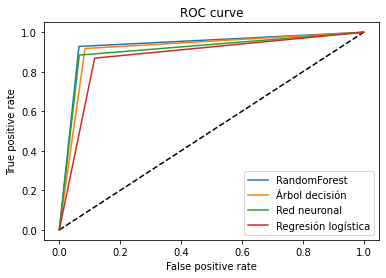

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf5, tpr_rf5, label='RandomForest')
plt.plot(fpr_kv, tpr_kv, label='Árbol decisión')
plt.plot(fpr_nn, tpr_nn, label='Red neuronal')
plt.plot(fpr_rg, tpr_rg, label='Regresión logística')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()